In [16]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

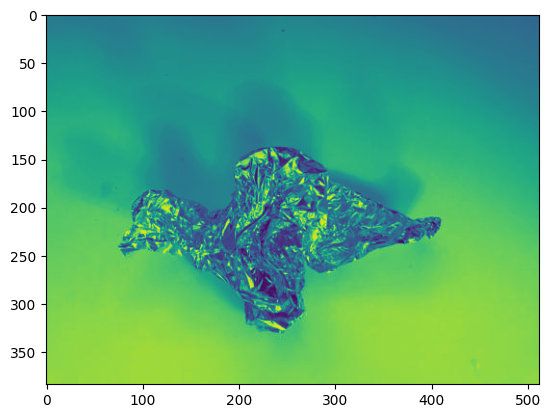

In [17]:
path = '/Users/Bingumalla Likith/Desktop/Garbage Classification/Dataset/Garbage classification/Garbage classification/metal/metal15.jpg'
img = cv2.imread(path)
processed_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(processed_img)

In [18]:
model = YOLO('best.pt')

In [19]:
def frames(frame):
    global model
    try:
        results = model.predict(frame)
        boxes = list(map(int, results[0].boxes.xywh[0]))
        class_index = int(results[0].boxes.cls[0])
        class_name = results[0].names[class_index]

        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2

        x , w , y , h = boxes
        cv2.rectangle(frame, (x-w//2, y-h//2), ((x-w//2)+ w ,(y-h//2)+ h), (0, 0, 255),2)
        cv2.putText(frame , class_name , (x-w//2, y-h//2-5) , font , font_scale ,(0, 255, 0), font_thickness)
    except:
        return frame
    return frame

In [20]:
def apply_variable_blur(image, depth_map):
    blurred_image = np.zeros_like(image, dtype=np.float64)
    rows, cols, _ = image.shape
    max_kernel_size = 25
    for i in range(rows):
        for j in range(cols):
            depth_value = depth_map[i, j]
            kernel_size = int(depth_value * max_kernel_size)
            if kernel_size % 2 == 0:
                kernel_size += 1
            local_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
            blurred_image[i, j] = local_blur[i, j]
    return blurred_image.astype(np.uint8)

cap = cv2.VideoCapture(0)

while True:
    ref, frame = cap.read()
    if ref:
        depth_map = np.random.rand(frame.shape[0], frame.shape[1])
        blurred_image = apply_variable_blur(frame, depth_map)
        frame = frames(frame)
        frame = cv2.resize(frame, (400, 400))
        cv2.imshow('Garbage Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.waitKey(1)
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


KeyboardInterrupt: 